### Import the necessary modules

In [81]:
# import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style
style.use('ggplot')
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,5
import warnings
warnings.filterwarnings('ignore')


### Import the dataset

In [82]:
#read in the data
df=pd.read_csv('/Users/brenden/Downloads/heart.csv')

### Dataset Overview

age: age of the patient

sex : sex of the patient

cp : chest pain type
0 = typical angina
1 = atypical angina
2 = non-anginal pain
3 = asymptomatic

trtbps : resting blood pressure in mm Hg

chol : cholestoral in mg/dl

exng : exercise induced angina
1 = yes
0 = no

fbs : fasting blood sugar > 120 mg/dl
1 = true
0 = false

restecg : resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

slp : slope

caa : number of major vessels

thall : thalium stress test result

target :
0 = less chance of heart attack
1 = more chance of heart attack

### Check  if dataset has imported correctly

In [83]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
#shape of dataset
df.shape

(303, 14)

#### Detailed informatiom about the dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Check for missing values

In [86]:
#check for null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Check for duplicated values

In [87]:
#check for duplicates
df.duplicated().sum()

1

### Removing the duplicated values

In [88]:
#remove duplicates
df.drop_duplicates(inplace= True)

#### Check if the duplicated values were removed.
we can see the size of our dataset has changed ,indicating that the duplicated values has been removed.

In [89]:

df.shape

(302, 14)

### Perform descriptive statistics

In [90]:
#descriptive statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data preprocessing

#### Check for outliers in the dataset

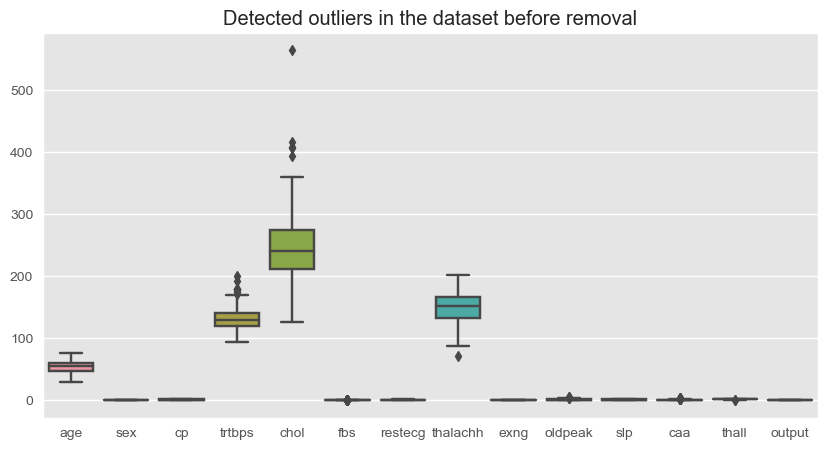

In [91]:
sns.boxplot(df)
plt.title('Detected outliers in the dataset before removal')
plt.show()

#### Outlier removal

In [92]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr=q3-q1
lwr_bound = q1-(1.5*iqr)
upr_bound = q3+(1.5*iqr)

df= df[((df >=lwr_bound) & (df <= upr_bound))]

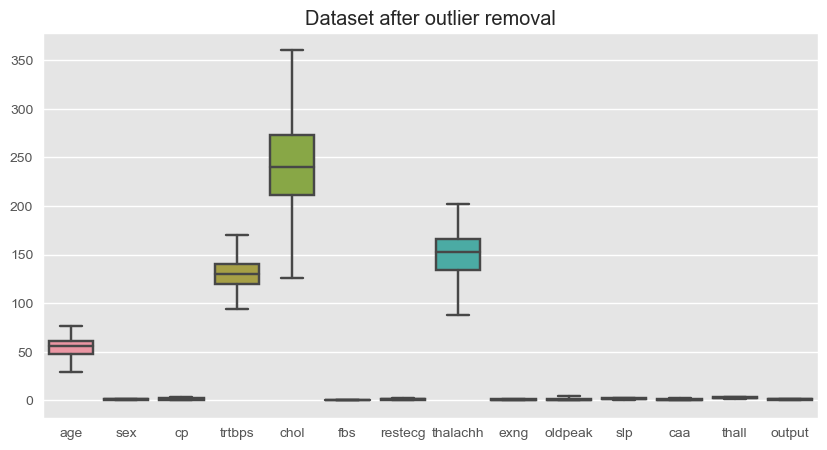

In [93]:
sns.boxplot(df)
plt.title('Dataset after outlier removal')
plt.show()

In [94]:
df.dropna(inplace=True)

#### Data distribution

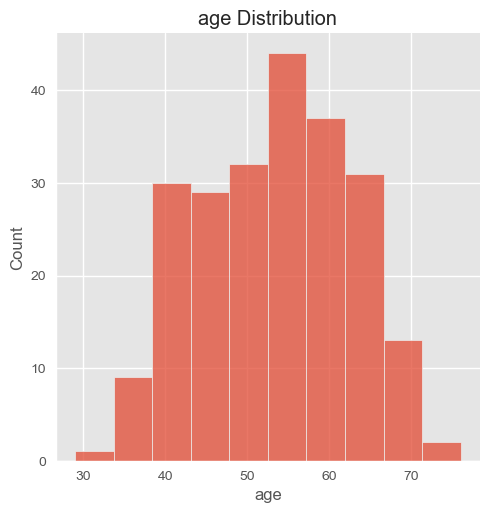

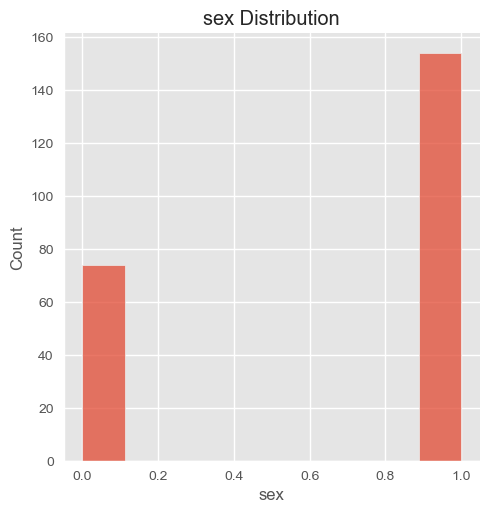

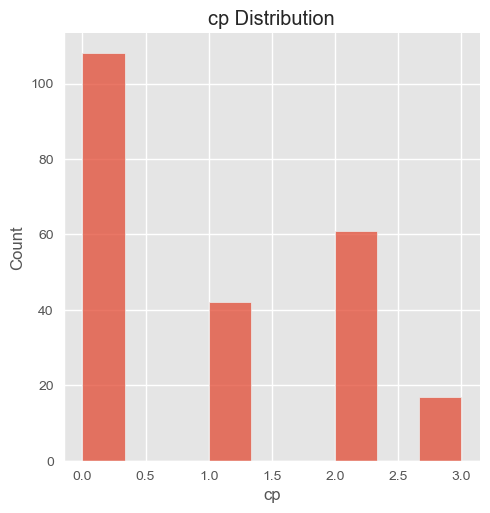

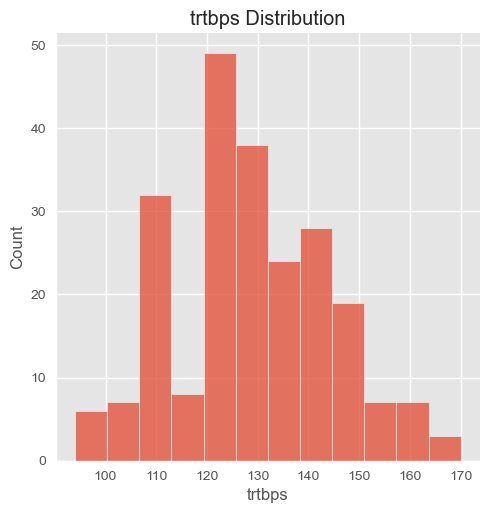

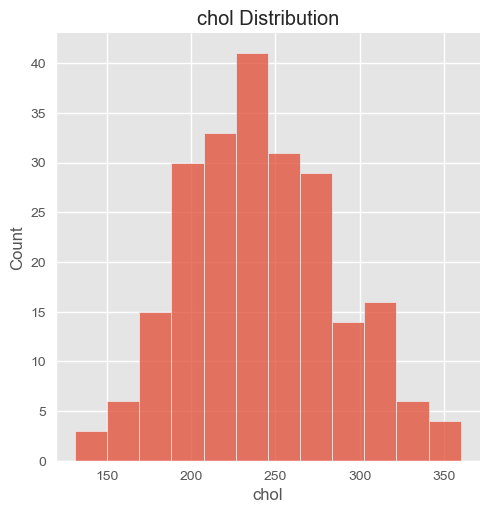

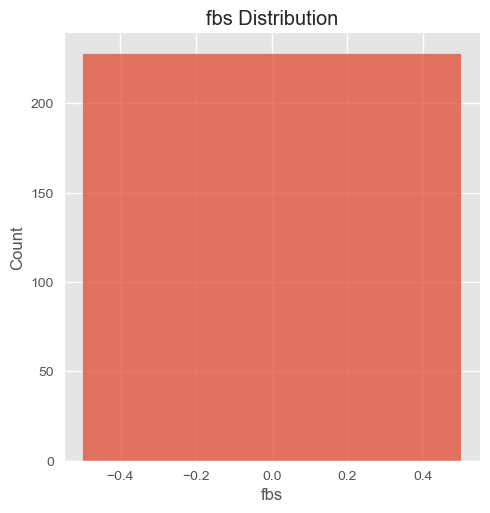

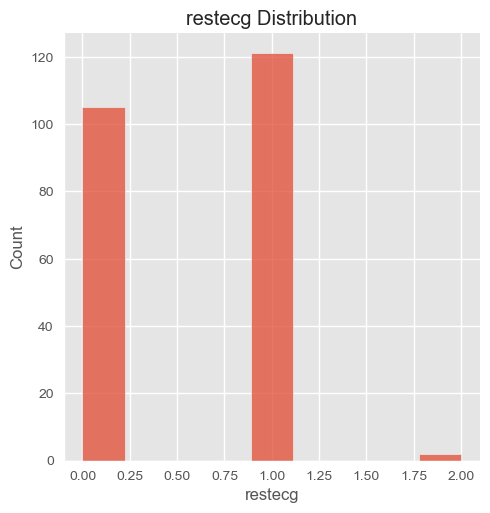

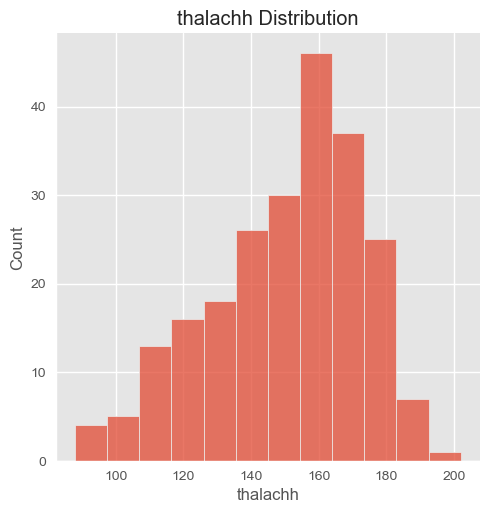

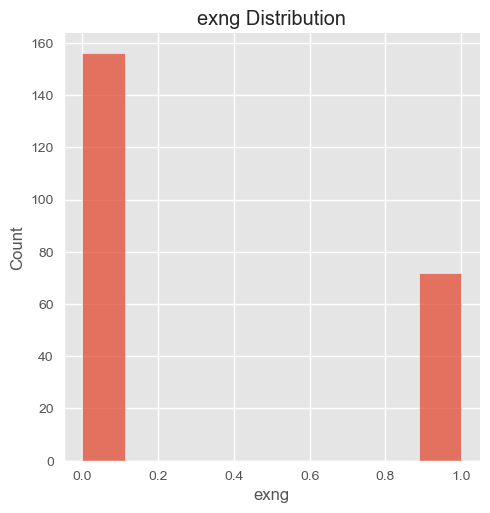

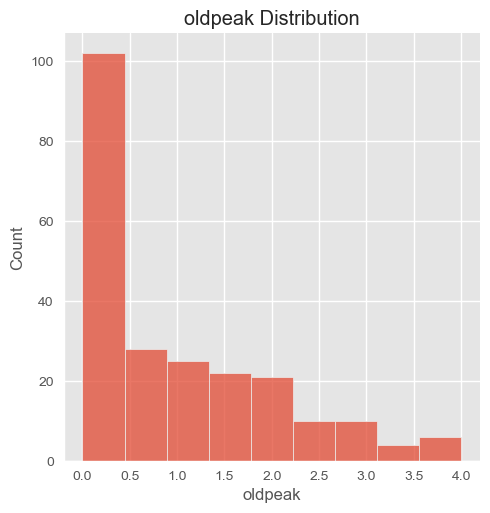

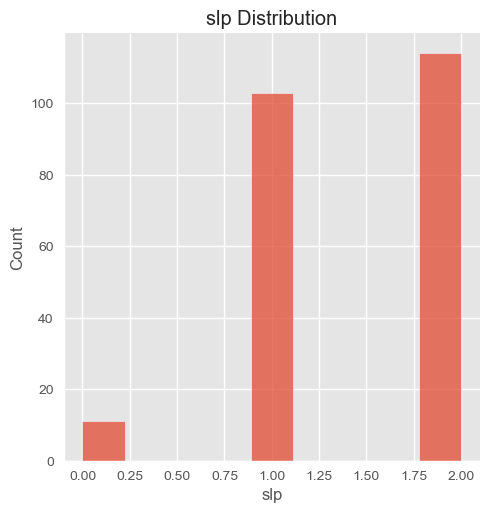

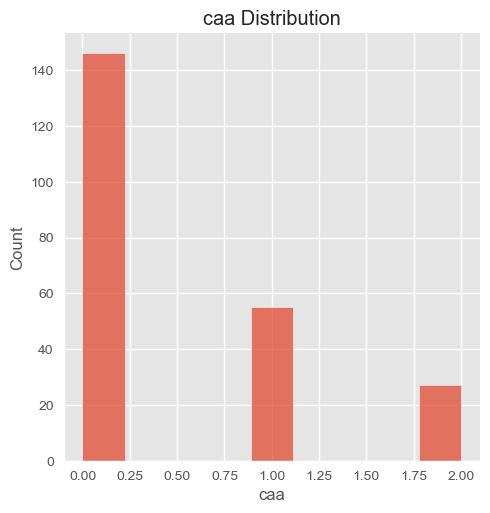

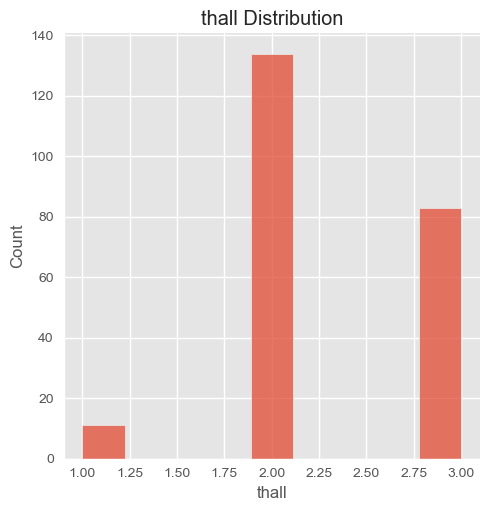

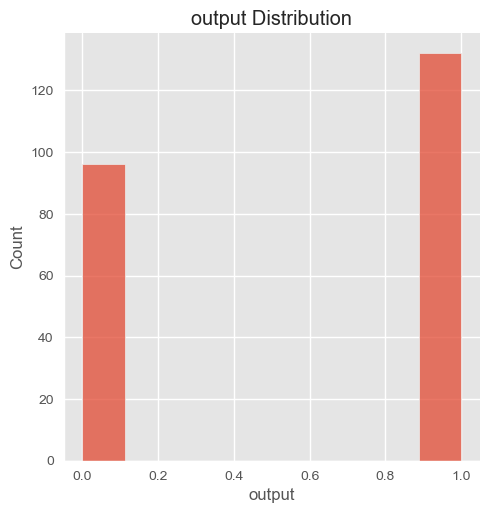

In [95]:
for col in df.columns:
    sns.displot(df[col])
    plt.title(f'{col} Distribution')
plt.show()

### Feature selection

In [96]:
features=df.iloc[:,0:13]

target=df['output']

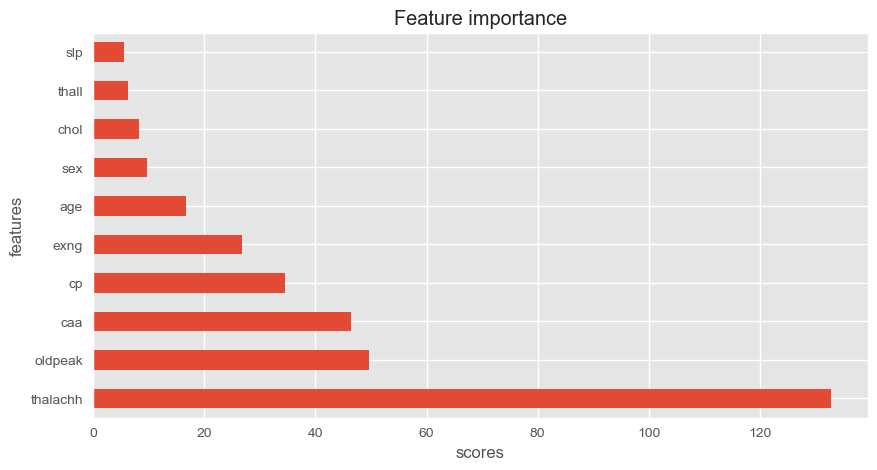

In [97]:
best=SelectKBest(score_func=chi2)

fit = best.fit(features, target)

score=pd.Series(fit.scores_,features.columns)
score.nlargest(10).plot(kind='barh')
plt.title('Feature importance')
plt.ylabel('features')
plt.xlabel('scores')
plt.show()

In [98]:
X=features[['thalachh','oldpeak','caa','cp','exng']]
y=target

### Standardize the  data

In [99]:
std_scaler= StandardScaler()
std_scaler.fit_transform(X,y)

array([[ 1.60089528,  2.47200312, -0.68550748,  1.03837841, -0.67936622],
       [ 0.93255277,  0.43938232, -0.68550748,  0.05601211, -0.67936622],
       [ 1.19988977, -0.14136648, -0.68550748,  0.05601211, -0.67936622],
       ...,
       [-0.84969393,  0.24579938, -0.68550748,  2.0207447 , -0.67936622],
       [-1.60714878,  0.24579938,  0.74839807, -0.92635418,  1.47196014],
       [ 1.0216651 , -0.91569822,  0.74839807,  0.05601211, -0.67936622]])

### Split the data into training & testing set

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 5)
(46, 5)
(182,)
(46,)


In [101]:
from sklearn.model_selection import GridSearchCV

## Hyperparameter tuning

### Create Logistic regression instance & train the model

In [103]:
parameters ={"multi_class":['auto','multinomial'],'penalty':['l2','l1'], 'solver':['lbfgs','saga','newton-cg']}# l1 lasso l2 ridge
logreg =LogisticRegression()
logreg = GridSearchCV(logreg, parameters, cv=10)
logreg.fit(X_train,y_train)
logreg

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'multinomial'],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']})

In [104]:
print("tuned hyperparameters :(best parameters) ",logreg.best_params_)
print("accuracy :",logreg.best_score_)

tuned hyperparameters :(best parameters)  {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8011695906432749


#### Calculate the accuracy of the model on the test dataset using score

In [105]:
logreg.score(X_test,y_test)

0.8260869565217391

Lets look at the confusion matrix:

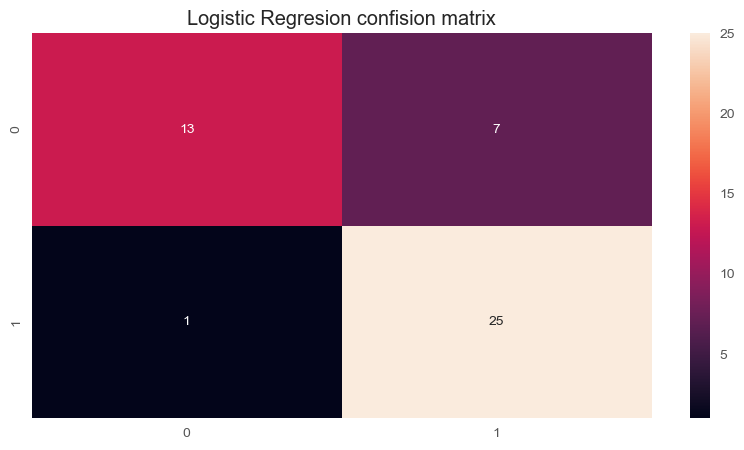

In [106]:
y_pred=logreg.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title('Logistic Regresion confision matrix')
plt.show()

### Create KNN instance and train the model

In [107]:
parameters =  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

In [108]:
knn = GridSearchCV(knn, parameters, cv=10)
knn.fit(X_train,y_train)
knn

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [109]:
print("tuned hyperparameters :(best parameters) ",knn.best_params_)
print("accuracy :",knn.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}
accuracy : 0.7523391812865496


In [110]:
knn.score(X_test,y_test)

0.782608695652174

Lets look at a KNN Confusion matrix

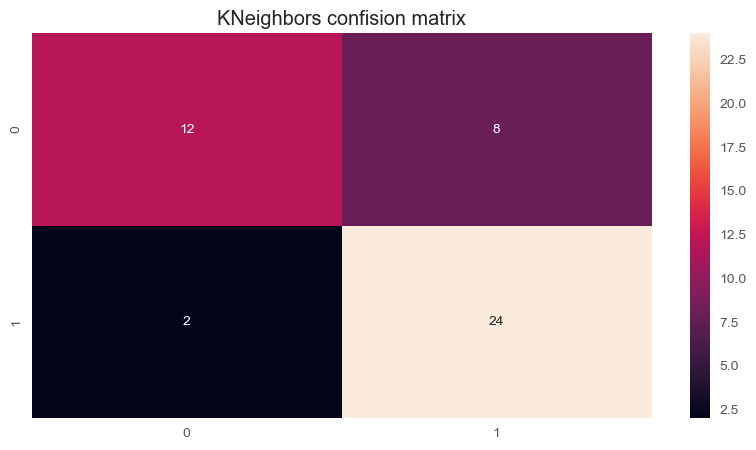

In [111]:
y_pred=knn.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title('KNeighbors confision matrix')
plt.show()

### Create intance for Decision tree classifier & train the model

In [112]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

dt = DecisionTreeClassifier()

In [113]:
dt = GridSearchCV(dt, parameters, cv=10)
dt.fit(X_train,y_train)
dt

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [114]:
print("tuned hyperparameters :(best parameters) ",dt.best_params_)
print("accuracy :",dt.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8122807017543859


In [115]:
dt.score(X_test,y_test)

0.8043478260869565

We can plot a confusion matrix

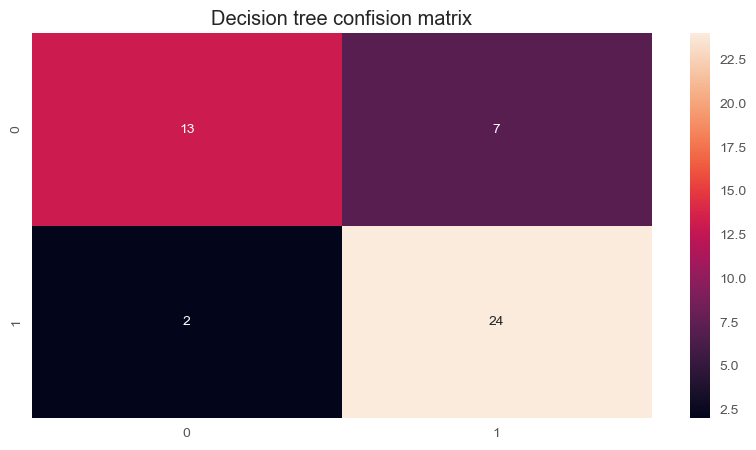

In [116]:
y_pred=dt.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title('Decision tree confision matrix')
plt.show()

### Create a Random Forest instance and train the model

In [142]:
parameters =  {'n_estimators': [10,30,50,60,80,100],
              'max_depth': [50,70,100,None],
              'max_features': ['auto']}

rf = RandomForestClassifier()

In [143]:
rf = GridSearchCV(rf, parameters, cv=10)
rf.fit(X_train,y_train)
rf

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 70, 100, None],
                         'max_features': ['auto'],
                         'n_estimators': [10, 30, 50, 60, 80, 100]})

In [144]:
print("tuned hyperparameters :(best parameters) ",rf.best_params_)
print("accuracy :",rf.best_score_)

tuned hyperparameters :(best parameters)  {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 30}
accuracy : 0.7742690058479532


In [145]:
rf.score(X_test,y_test)

0.7608695652173914

### Best model performance

In [149]:
score = {'Accuracy Train': [logreg.best_score_, knn.best_score_ ,dt.best_score_, rf.best_score_], 
     'Accuracy Test': pd.Series([logreg.score(X_test,y_test), knn.score(X_test,y_test) ,dt.score(X_test,y_test), rf.score(X_test,y_test)], index=["LR", "RF", "DT", "KNN"])}
score = pd.DataFrame(data=score).reset_index()
score

,index,Accuracy Train,Accuracy Test
0,LR,0.801170,0.826087
1,RF,0.752339,0.782609
2,DT,0.812281,0.804348
3,KNN,0.774269,0.760870


### Plot model performance on the test dataset

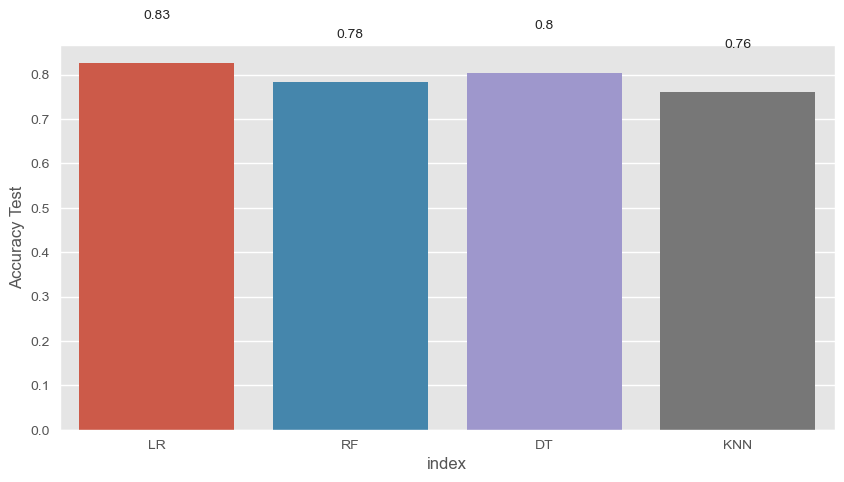

In [150]:
sns.barplot(data=score, x="index", y="Accuracy Test")
for i, v in enumerate(score["Accuracy Test"]):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center')
plt.show()    

##### We can see that Logistic Regression & DecisionTreeClassifier are the best performing models 